# Individual Project

## Packages

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings. filterwarnings('ignore') 
from pywaffle import Waffle
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

## Loading data

In [112]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [113]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Description

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

## Data Preprocessing

### Data types

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


All columns have correct data types.

### Dealing with NAs

In [115]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

We know that NaN is not a missing value but rather represents individuals who do not have a sleep disorder, so I changed them to 'None'.

In [116]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

In [117]:
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Duplicates

In [118]:
df.duplicated().sum()

0

In [119]:
df.drop(columns=['Person ID'],axis=1,inplace = True)

At first, it seemed that we didn't have duplicates, but once I dropped the ID column, it appeared that we actually have a lot

In [120]:
df.duplicated().sum()

242



Since this is a fictional dataset, I am not surprised that my rows are duplicated, so I decided to drop them.

In [121]:
df_cleaned = df.drop_duplicates()

In [122]:
df_cleaned

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None
359,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
360,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [123]:
df_cleaned.duplicated().sum()

0

### Getting to know columns

In [124]:
df_cleaned['BMI Category'].value_counts().reset_index()

,BMI Category,count
0,Normal,57
1,Overweight,52
2,Normal Weight,16
3,Obese,7


'Normal' and 'Normal Weight' are same, so I decided to change all into 'Normal'

In [125]:
df_cleaned['BMI Category']= df_cleaned['BMI Category'].replace({'Normal Weight': 'Normal'})
BMI = df_cleaned['BMI Category'].value_counts().reset_index()
BMI

,BMI Category,count
0,Normal,73
1,Overweight,52
2,Obese,7


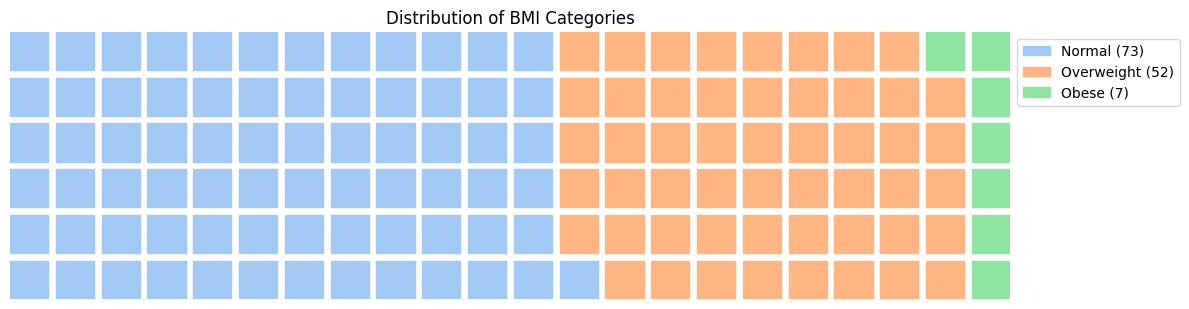

In [126]:
colors = sns.color_palette("pastel", 3)
waffle = dict(zip(BMI['BMI Category'], BMI['count']))

fig = plt.figure(
    FigureClass=Waffle,
    rows=6,  
    values=waffle,
    labels=[f"{k} ({v})" for k, v in waffle.items()],
    figsize=(12, 6),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=colors  
)

plt.title('Distribution of BMI Categories')
plt.show()

In [127]:
sleep = df_cleaned['Sleep Disorder'].value_counts().reset_index()
sleep

,Sleep Disorder,count
0,None,73
1,Sleep Apnea,30
2,Insomnia,29


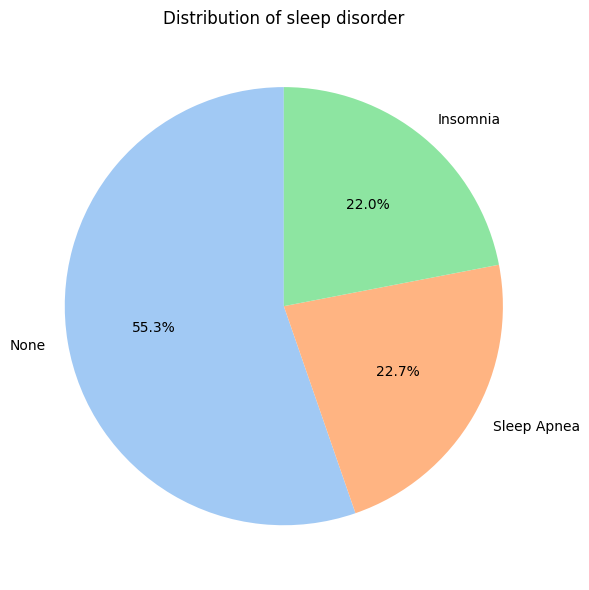

In [128]:
colors = sns.color_palette("pastel").as_hex()

plt.figure(figsize=(8, 6))
plt.pie(sleep['count'], labels=sleep['Sleep Disorder'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of sleep disorder')
plt.tight_layout()
plt.show()

**Insomnia**: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.<br>
**Sleep Apnea**: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

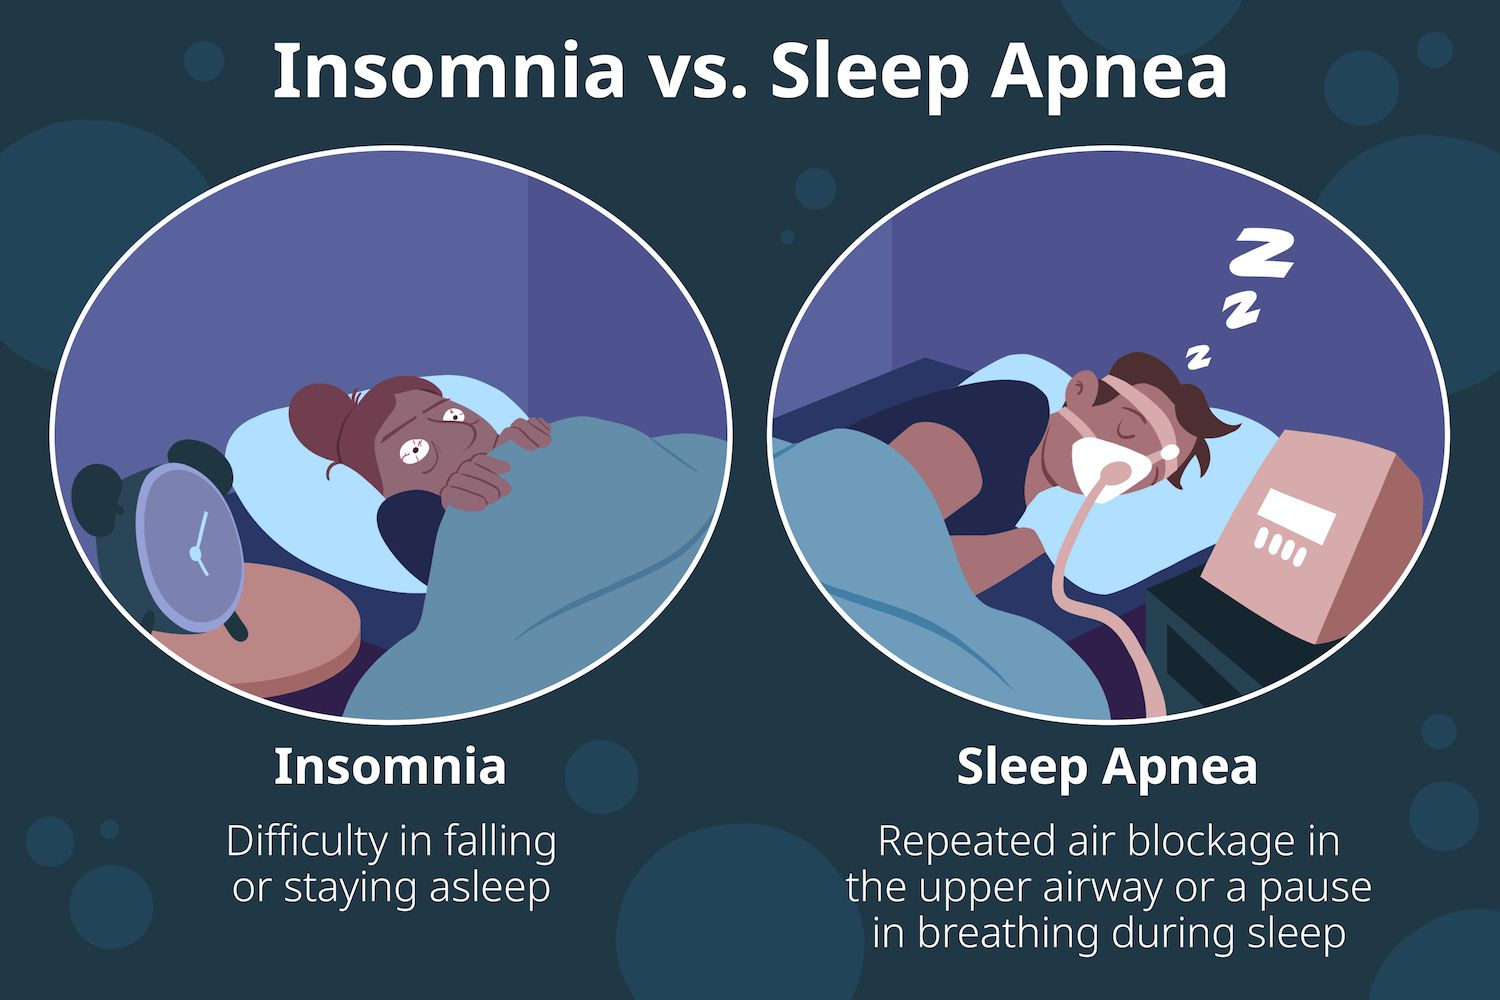

In [129]:
gender = df_cleaned['Gender'].value_counts().reset_index()
gender

,Gender,count
0,Male,67
1,Female,65


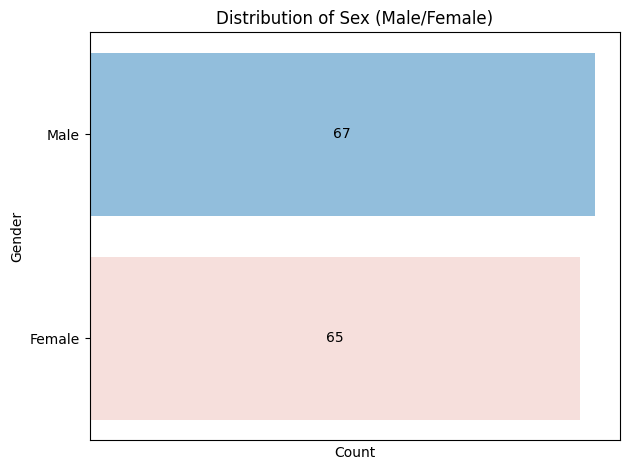

In [130]:
pastel = ["#85C1E9", "#FADBD8"]

sns.barplot(data=gender, y='Gender', x='count', palette=pastel)
plt.title('Distribution of Sex (Male/Female)')
plt.xlabel('Count')
plt.yticks(rotation=0)

ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.text(width / 2, p.get_y() + p.get_height() / 2, int(width), 
            ha='center', va='center', color='black')


plt.gca().set_xticks([])
plt.tight_layout()
plt.show()

In [131]:
occupation=df_cleaned['Occupation'].value_counts().reset_index()
occupation

,Occupation,count
0,Nurse,29
1,Doctor,24
2,Engineer,22
3,Teacher,15
4,Lawyer,15
5,Accountant,11
6,Salesperson,9
7,Software Engineer,3
8,Scientist,2
9,Sales Representative,1


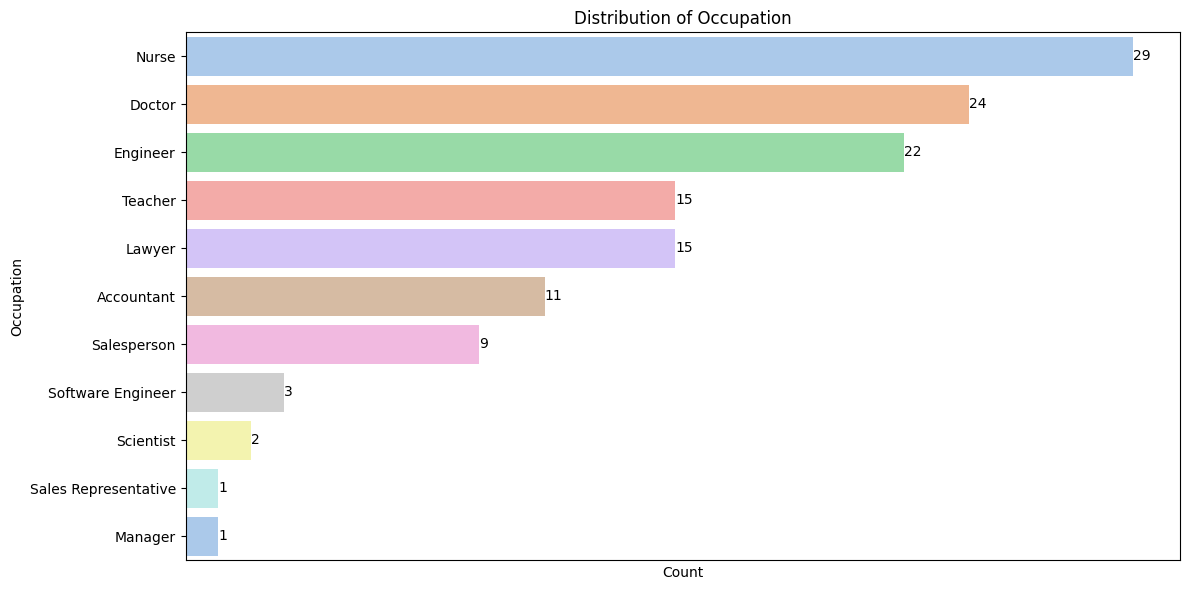

In [132]:
colors = sns.color_palette("pastel")

plt.figure(figsize=(12,6))
sns.barplot(data=occupation, x='count', y='Occupation', palette=colors)
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(rotation=0)


ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, int(width), 
            ha='left', va='center', color='black')


plt.gca().set_xticks([])
plt.tight_layout()
plt.show()

In [133]:
df_cleaned['Blood Pressure']

0      126/83
1      125/80
3      140/90
5      140/90
6      140/90
        ...  
358    140/95
359    140/95
360    140/95
364    140/95
366    140/95
Name: Blood Pressure, Length: 132, dtype: object

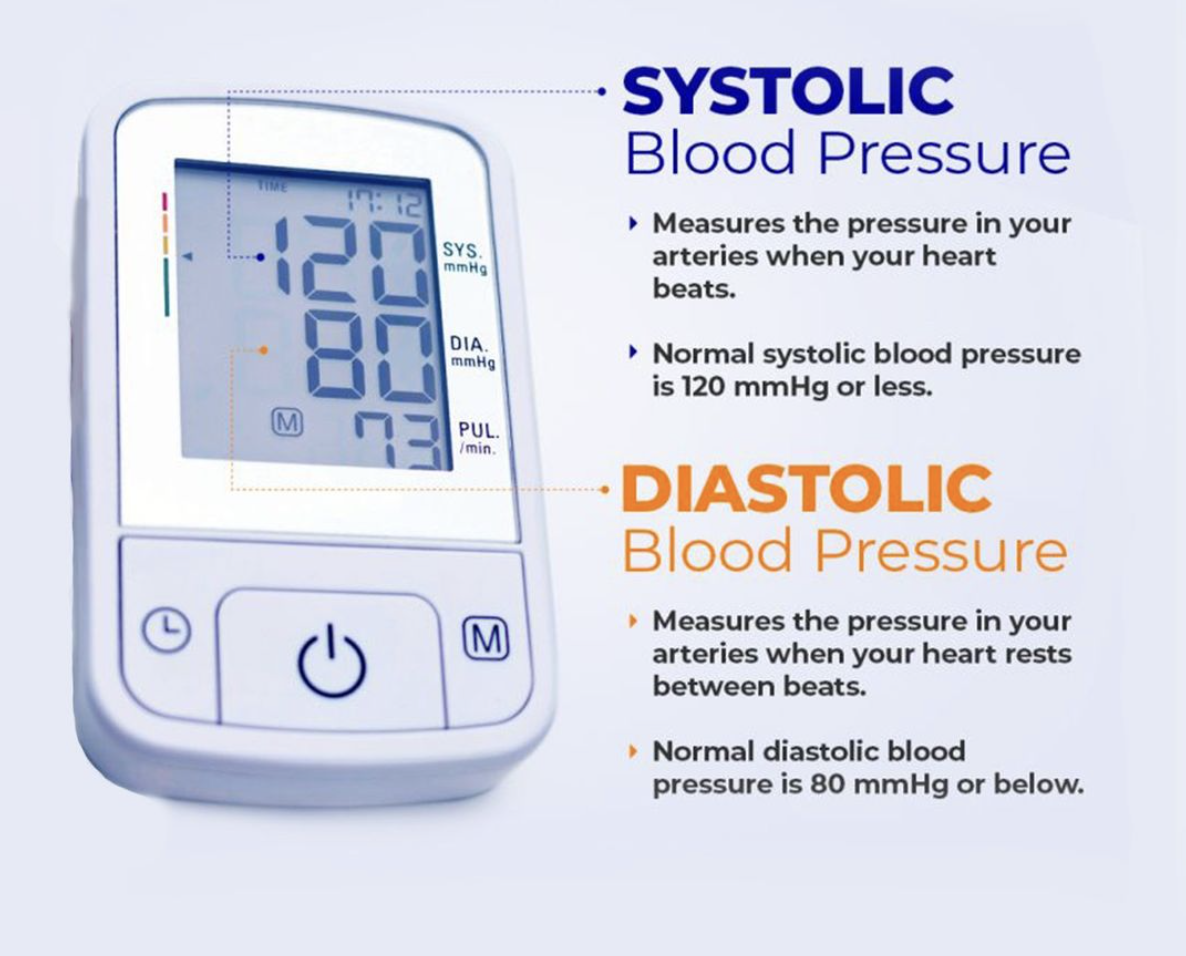

According to the [American Heart Association ](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings),Blood Pressure values can be classified based on **Systolic** and **Diastolic** values, identifying 5 possible categories: 


| Category | Systolic Pressure | Diastolic Pressure  |
|---|---|---|
| Normal | less than 120 | less than 80 |
| ELEVATED | 120-129 | less than 80|
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 1| 130 – 139 | 80 – 89|
| HIGH BLOOD PRESSURE (HYPERTENSION) STAGE 2| 140 or higher  | 90 and higher|
| HYPERTENSIVE CRISIS  | higher than 180 | higher than 120 |

In [134]:
df_cleaned[['Systolic Pressure', 'Diastolic Pressure']] = df_cleaned['Blood Pressure'].str.split('/', expand=True)
df_cleaned.drop(columns=['Blood Pressure'],axis=1,inplace = True)

In [135]:
df_cleaned['Systolic Pressure'].dtype
df_cleaned['Diastolic Pressure'].dtype

dtype('O')

In [136]:
df_cleaned['Systolic Pressure'] = pd.to_numeric(df_cleaned['Systolic Pressure'])
df_cleaned['Diastolic Pressure'] = pd.to_numeric(df_cleaned['Diastolic Pressure'])

In [137]:
conditions = [
    (df_cleaned['Systolic Pressure'] < 120) & (df_cleaned['Diastolic Pressure'] < 80),
    (df_cleaned['Systolic Pressure'].between(120, 129)) & (df_cleaned['Diastolic Pressure'] < 80),
    (df_cleaned['Systolic Pressure'].between(130, 139)) & (df_cleaned['Diastolic Pressure'].between(80, 89)),
    (df_cleaned['Systolic Pressure'] >= 140) | (df_cleaned['Diastolic Pressure'] >= 90),
    (df_cleaned['Systolic Pressure'] > 180) | (df_cleaned['Diastolic Pressure'] > 120)
]

categories = ['NORMAL', 'ELEVATED', 'HYPERTENSION STAGE 1',
              'HYPERTENSION STAGE 2', 'HYPERTENSIVE CRISIS']

df_cleaned['Blood Pressure Category'] = np.select(conditions, categories, default='UNKNOWN')
df_cleaned


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83,UNKNOWN
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80,UNKNOWN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,HYPERTENSION STAGE 2
5,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,HYPERTENSION STAGE 2
6,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,HYPERTENSION STAGE 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,None,140,95,HYPERTENSION STAGE 2
359,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,None,140,95,HYPERTENSION STAGE 2
360,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,HYPERTENSION STAGE 2
364,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,HYPERTENSION STAGE 2


In [138]:
pressure=df_cleaned['Blood Pressure Category'].value_counts().reset_index()
pressure

,Blood Pressure Category,count
0,UNKNOWN,47
1,HYPERTENSION STAGE 1,36
2,HYPERTENSION STAGE 2,33
3,NORMAL,15
4,ELEVATED,1


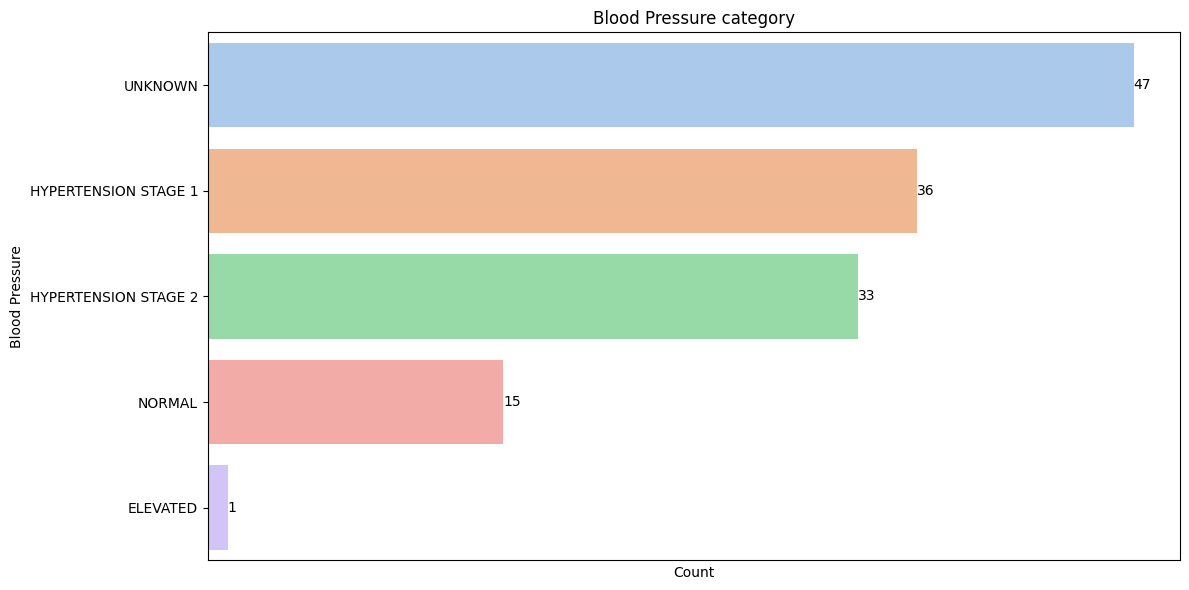

In [139]:
colors = sns.color_palette("pastel")

plt.figure(figsize=(12,6))
sns.barplot(data=pressure, x='count', y='Blood Pressure Category', palette=colors)
plt.title('Blood Pressure category')
plt.xlabel('Count')
plt.ylabel('Blood Pressure')
plt.xticks(rotation=0)


ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    ax.text(width, p.get_y() + p.get_height() / 2, int(width), 
            ha='left', va='center', color='black')


plt.gca().set_xticks([])
plt.tight_layout()
plt.show()

### Statistical approach

In [140]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,132.0,41.128788,8.813942,27.0,33.75,41.00,49.000,59.0
Sleep Duration,132.0,7.082576,0.775335,5.8,6.40,7.15,7.725,8.5
Quality of Sleep,132.0,7.151515,1.269037,4.0,6.00,7.00,8.000,9.0
Physical Activity Level,132.0,58.393939,20.468840,30.0,44.25,60.00,75.000,90.0
Stress Level,132.0,5.537879,1.740428,3.0,4.00,6.00,7.000,8.0
Heart Rate,132.0,71.204545,4.867306,65.0,68.00,70.00,74.000,86.0
Daily Steps,132.0,6637.878788,1766.288657,3000.0,5000.00,7000.00,8000.000,10000.0
Systolic Pressure,132.0,128.363636,7.825650,115.0,120.75,130.00,135.000,142.0
Diastolic Pressure,132.0,84.537879,6.049926,75.0,80.00,85.00,88.500,95.0


**Age**: The average age of the individuals in the dataset is around 41 years, with a standard deviation of approximately 8.81 years. The age range is from 27 to 59 years.<br>

**Sleep Duration**: On average, individuals in the dataset sleep for about 7.08 hours, with a standard deviation of approximately 0.78 hours. The range of sleep duration is from 5.8 to 8.5 hours.<br>

**Quality of Sleep**: The average quality of sleep is around 7.15 hours, with a standard deviation of approximately 1.27. The range of quality of sleep is from 4 to 9.<br>

**Physical Activity Level**: The average physical activity level for per day is about 58.39 minutes, with a standard deviation of approximately 20.47. The activity level ranges from 30 to 90.<br>

**Stress Level**: The average stress level is approximately 5.54, with a standard deviation of about 1.74. Stress levels range from 3 to 8.<br>

**Heart Rate**: The average heart rate is around 71.20 beats per minute, with a standard deviation of approximately 4.87. Heart rates range from 65 to 86 beats per minute.<br>

**Daily Steps**: On average, individuals take about 6637.88 steps per day, with a standard deviation of approximately 1766.29. The number of daily steps ranges from 3000 to 10000.<br>

**Blood Pressure**: 

The average systolic blood pressure is about 128.36 mmHg, with a standard deviation of approximately 7.83. The systolic blood pressure ranges from 115 to 142 mmHg. <br>

The average diastolic blood pressure is approximately 84.54 mmHg, with a standard deviation of about 6.05. Diastolic blood pressure ranges from 75 to 95 mmHg.<br>

In [141]:
df_cleaned.describe(include = 'object').T

,count,unique,top,freq
Gender,132,2,Male,67
Occupation,132,11,Nurse,29
BMI Category,132,3,Normal,73
Sleep Disorder,132,3,None,73
Blood Pressure Category,132,5,UNKNOWN,47


**Gender**: There are 132 individuals in the dataset, with 2 unique genders (Male and Female). The most frequent gender is Male, with a frequency of 67. <br>

**Occupation**: There are 132 individuals in the dataset, with 11 unique occupations. The most frequent occupation is Nurse, with a frequency of 29.<br>

**BMI Category**: There are 132 individuals in the dataset, with 3 unique BMI categories (Normal, Overweight, and Obese). The most frequent BMI category is Normal, with a frequency of 73.<br>

**Sleep Disorder**: There are 132 individuals in the dataset, with 3 unique sleep disorder categories (None, Sleep Apnea, and Insomnia). The most frequent sleep disorder category is None, with a frequency of 73.<br>

**Blood Pressure Category**: There are 132 individuals in the dataset, with 5 unique blood pressure categories (UNKNOWN, Normal, Elevated, Hypertension Stage 1, and Hypertension Stage 2). The most frequent blood pressure category is UNKNOWN, with a frequency of 47.<br>

## Correlation  Matrix

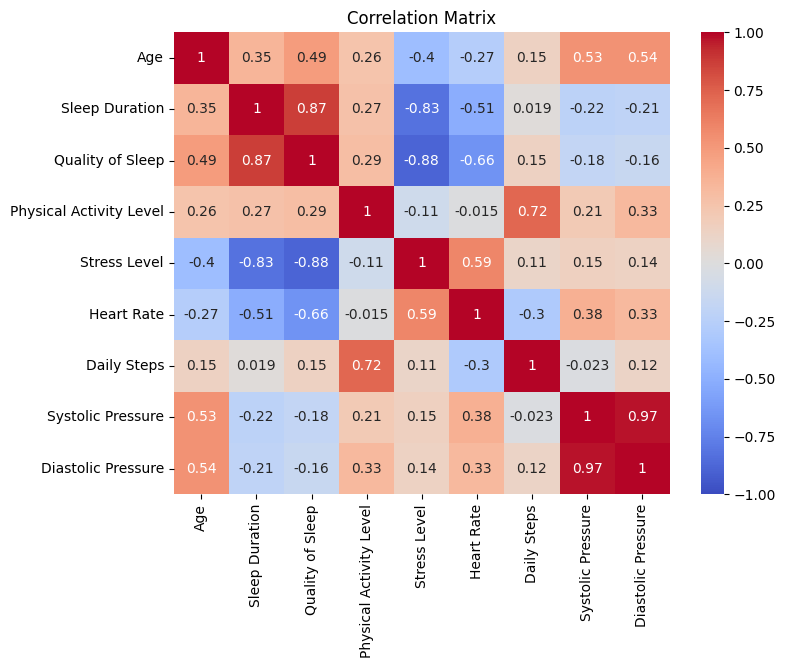

In [142]:
numerical_columns = df_cleaned.select_dtypes(include='number')
corr = numerical_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()


There are several classifications of magnitude, like that of [Evans](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9420886/), which interprets:

correlations <0.20 as very weak <br>
correlations between 0.20-0.39 as weak <br>
correlations 0.40-0.59 as moderate <br>
correlations 0.60-0.79 as strong <br>
correlations >0.80 as very strong <br>

## Meaningful analysis

- <span style="color:#E6D6AD; font-weight: bold;">Age may be associated with sleep duration, quality of sleep, and blood pressure.</span>
- <span style="color:#B7CECE; font-weight: bold;">Sleep duration could be linked to quality of sleep, age, and physical activity level.</span>
- <span style="color:#AEC6CF; font-weight: bold;">Physical activity level might strongly relate to daily steps.</span>
- <span style="color:#F9CCCA; font-weight: bold;">Stress level could be related to heart rate.</span>
- <span style="color:#D9D2E9; font-weight: bold;">Systolic and diastolic pressures show a strong correlation, suggesting a potential association with age, stress level, and physical activity level.</span>
- <span style="color:#FFD8B1; font-weight: bold;">Stress level and sleep duration/quality of sleep have a negative correlation, meaning that as stress level increases, sleep duration or quality tends to decrease, and vice versa.</span>


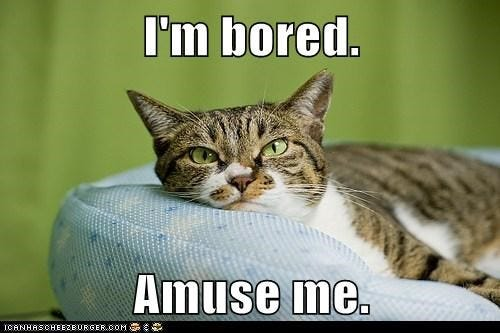

### Sleep duration, Quality of Sleep and age

In [143]:
fig = px.scatter_3d(df_cleaned, x='Age', y='Quality of Sleep', z='Sleep Duration', color='Sleep Duration')
fig.update_layout(title='Relationship between Age, Quality of Sleep, and Sleep Duration',title_x=0.5,
                  scene=dict(xaxis_title='Age', yaxis_title='Quality of Sleep', zaxis_title='Sleep Duration'))
fig.show()

### Sleep Duration,Sleep Disorder and Stress Level

In [144]:
fig = px.scatter_3d(df_cleaned, x='Stress Level', y='Sleep Duration', z='Sleep Disorder', color='Sleep Disorder',
                     symbol='Sleep Disorder', opacity=0.7, size_max=10)
fig.update_layout(title='Relationship between Stress Level, Sleep Duration, and Sleep Disorder',title_x=0.5,
                  scene=dict(xaxis_title='Stress Level', yaxis_title='Sleep Duration', zaxis_title='Sleep Disorder'))
fig.show()


### Physical Activity, Daily Steps and BMI Category

In [145]:
fig = px.scatter_3d(df_cleaned, x='Physical Activity Level', y='Daily Steps', z='BMI Category', color='BMI Category',
                     symbol='BMI Category', opacity=0.7, size_max=10)
fig.update_layout(title='Relationship between Physical Activity, Daily Steps, and BMI',title_x=0.5,
                  scene=dict(xaxis_title='Physical Activity', yaxis_title='Daily Steps', zaxis_title='BMI'))
fig.show()

# My hypothesis

I strongly believe that occupation has an effect on sleep, which can lead to sleep disorders. Personally, I think that doctors and nurses, especially those who work night shifts, have a higher probability of experiencing sleep disorders than people in other professions. Let's visualize this to check.

In [146]:
pastel_colors = ['#F9EBEA', '#F2D7D5', '#E6B0AA', '#E6B0AA']

fig = px.treemap(df_cleaned, path=[ 'Sleep Disorder', 'Occupation'],
                 color='Sleep Disorder',
                 color_discrete_map={'None': pastel_colors[0], 
                                     'Sleep Apnea': pastel_colors[1], 
                                     'Insomnia': pastel_colors[2]})

fig.update_layout(title='<b>The effect of a person\'s profession on sleep</b>',
                  title_font={'size': 25},title_x=0.5)

fig.show()

Stress levels differ between males and females. My next hypothesis is that women have higher stress levels compared to men

In [147]:
pastel_colors = {"Female": "#85C1E9", "Male": "#FADBD8"}

pivot_df = df_cleaned.groupby(['Stress Level', 'Gender']).size().unstack(fill_value=0).reset_index()
melted_df = pivot_df.melt(id_vars='Stress Level', value_vars=['Female', 'Male'], var_name='Gender', value_name='Count')

fig = px.bar(melted_df, x='Stress Level', y='Count', color='Gender', barmode='stack',
             title='Stress Level by Gender', labels={'Stress Level': 'Stress Level', 'Count': 'Count'},
             color_discrete_map=pastel_colors)


fig.update_layout(plot_bgcolor='white', title_x=0.5)
fig.update_yaxes(showticklabels=False)
fig.show()


# Novelty Component

In [148]:
fig = px.scatter(df_cleaned, x="Age", y="Stress Level", color="Occupation", size="Quality of Sleep",
                 hover_name="Occupation", animation_frame="Occupation", range_x=[20, 60],
                 range_y=[0, 10], title="Stress Level and Age by Occupation",
                 labels={"Age": "Age", "Stress Level": "Stress Level", "Occupation": "Occupation",
                         "Quality of Sleep": "Quality of Sleep"})

fig.update_layout(title_x=0.5, plot_bgcolor='white', xaxis_title="Age", yaxis_title="Stress Level")
fig.show()

In [149]:
fig = px.scatter(df_cleaned, x="Physical Activity Level", y="Daily Steps", color="BMI Category", size="Heart Rate",
                 hover_name="BMI Category", animation_frame="BMI Category", range_y=[3000, 10000],
                 title="Daily Steps and Physical Activity Level by BMI Category",
                 labels={"Physical Activity Level": "Physical Activity Level", "Heart Rate": "Heart Rate",
                         "BMI Category": "BMI Category"},
                 color_discrete_sequence=["blue", "red", "green"])

fig.update_layout(title_x=0.5, plot_bgcolor='white', xaxis_title="Physical Activity Level", yaxis_title="Daily Steps")
fig.show()


# Petrosyan Anahit Artur